In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
iris = pd.read_csv("Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris = iris.drop("Id", axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# complete IRIS dataset
label_encoder = preprocessing.LabelEncoder()
iris["Species"] = label_encoder.fit_transform(iris["Species"])

In [9]:
iris.tail(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [10]:
iris["Species"].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [11]:
x = iris.iloc[:,0:4]
y = iris["Species"]

In [12]:
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size=0.2)

In [13]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
55,5.7,2.8,4.5,1.3
80,5.5,2.4,3.8,1.1
69,5.6,2.5,3.9,1.1
129,7.2,3.0,5.8,1.6
8,4.4,2.9,1.4,0.2
...,...,...,...,...
85,6.0,3.4,4.5,1.6
112,6.8,3.0,5.5,2.1
88,5.6,3.0,4.1,1.3
3,4.6,3.1,1.5,0.2


# Buliding Decision Tree Classifier using Entropy Criteria

In [14]:
model = DecisionTreeClassifier(criterion= 'entropy', max_depth=3)
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.3333333333333333, 0.875, 'x[2] <= 2.45\nentropy = 1.584\nsamples = 120\nvalue = [39, 39, 42]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 4.75\nentropy = 0.999\nsamples = 81\nvalue = [0, 39, 42]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.6666666666666666, 0.375, 'x[2] <= 5.15\nentropy = 0.426\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.5, 0.125, 'entropy = 0.837\nsamples = 15\nvalue = [0, 4, 11]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 31\nvalue = [0, 0, 31]')]

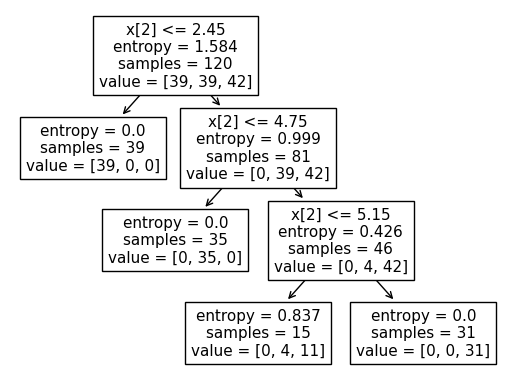

In [15]:
# plot the decision tree
tree.plot_tree(model)

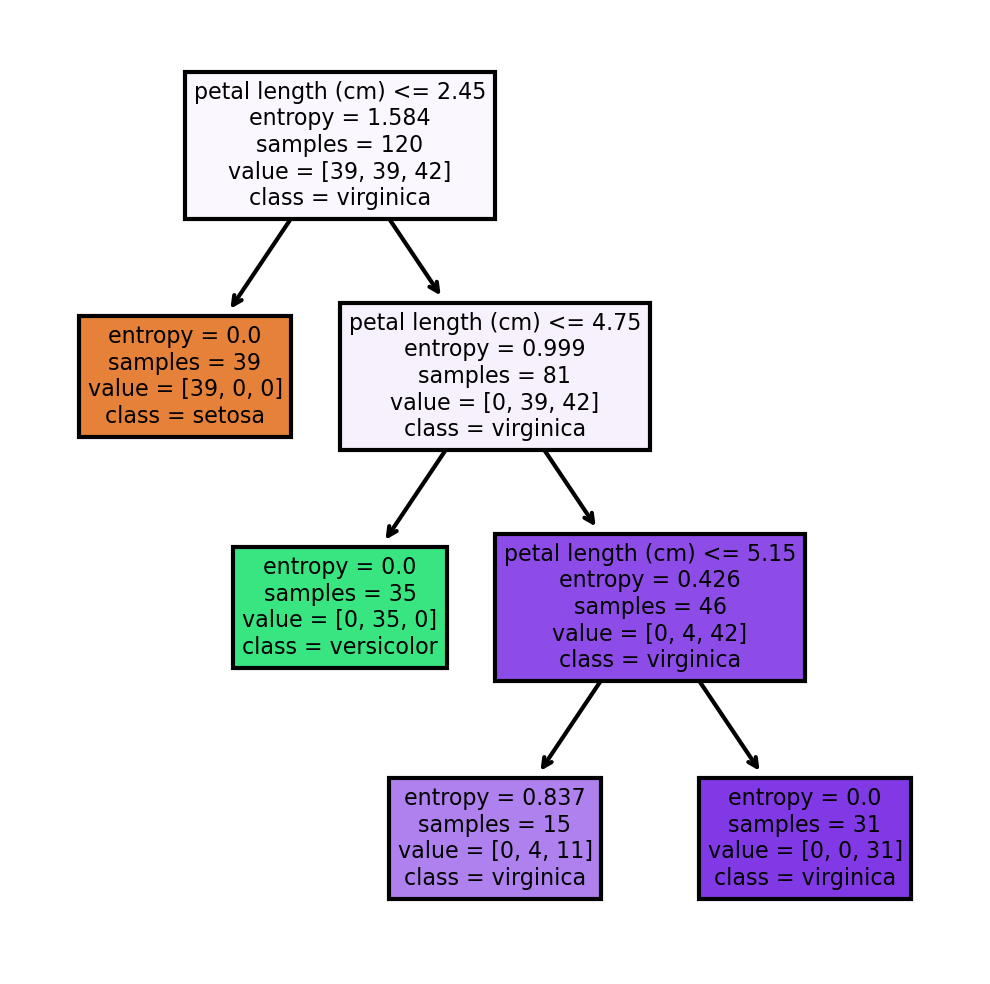

In [16]:
fn = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize =(4,4), dpi=300)
tree.plot_tree(model, feature_names= fn, class_names= cn, filled = True);


In [18]:
preds = model.predict(X_test) # predicting on test data 
pd.Series(preds).value_counts()# getting the count of each category

0    11
1    10
2     9
dtype: int64

In [19]:
Y_test

39     0
41     0
64     1
144    2
128    2
48     0
26     0
45     0
106    2
86     1
62     1
84     1
63     1
17     0
135    2
59     1
4      0
79     1
67     1
74     1
2      0
121    2
29     0
126    2
32     0
149    2
146    2
72     1
37     0
76     1
Name: Species, dtype: int32

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.82      0.86        11
           2       0.78      0.88      0.82         8

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.90      0.90      0.90        30



In [22]:
print(confusion_matrix(Y_test, preds))

[[11  0  0]
 [ 0  9  2]
 [ 0  1  7]]
